In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

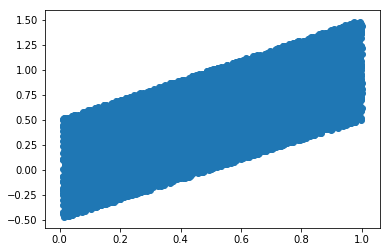

In [2]:
n = 10000
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 1, n)  + np.random.rand(n) - .5


plt.scatter(x,y)

# Assignment 5

## 1. Create and fit a Linear Regression Model
## Calculate the Training error and Testing error using sklearn with a .50 split 
For error, use `mean_squared`, but if you want to experiment with other mean errors, please do!

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.5)

lr = LinearRegression()
lr.fit(xtrain,ytrain)

train_err = mean_squared_error(ytrain, np.dot(xtrain, lr.coef_) + lr.intercept_)
test_err =  mean_squared_error(ytest, np.dot(xtest,lr.coef_) + lr.intercept_)

print('train error: {0}'.format(train_err))
print('test error: {0}'.format(test_err))
print('slope:{0}'.format(lr.coef_))

train error: 0.08447252784478264
test error: 0.08368899099673137
slope:[1.02132297]


## 2.  Repeat #1 for a Ridge Regression

In [4]:
from sklearn.linear_model import Ridge
ridge = Ridge(fit_intercept=True)
ridge.fit(xtrain, ytrain)

train_err = mean_squared_error(ytrain, np.dot(xtrain, ridge.coef_) + ridge.intercept_)
test_err =  mean_squared_error(ytest, np.dot(xtest,ridge.coef_) + ridge.intercept_)

print('train error: {0}'.format(train_err))
print('test error: {0}'.format(test_err))

train error: 0.08402671905858511
test error: 0.08417675172400539


## 3. Vary the `split` size from .01 to .99 with at least 10 values (the more the merrier!). Plot the resulting Training error and Testing error vs. `split` size. Create separate plots for Linear and Ridge

min error 0.08380034400734329
optimal split at 0.16473684210526315


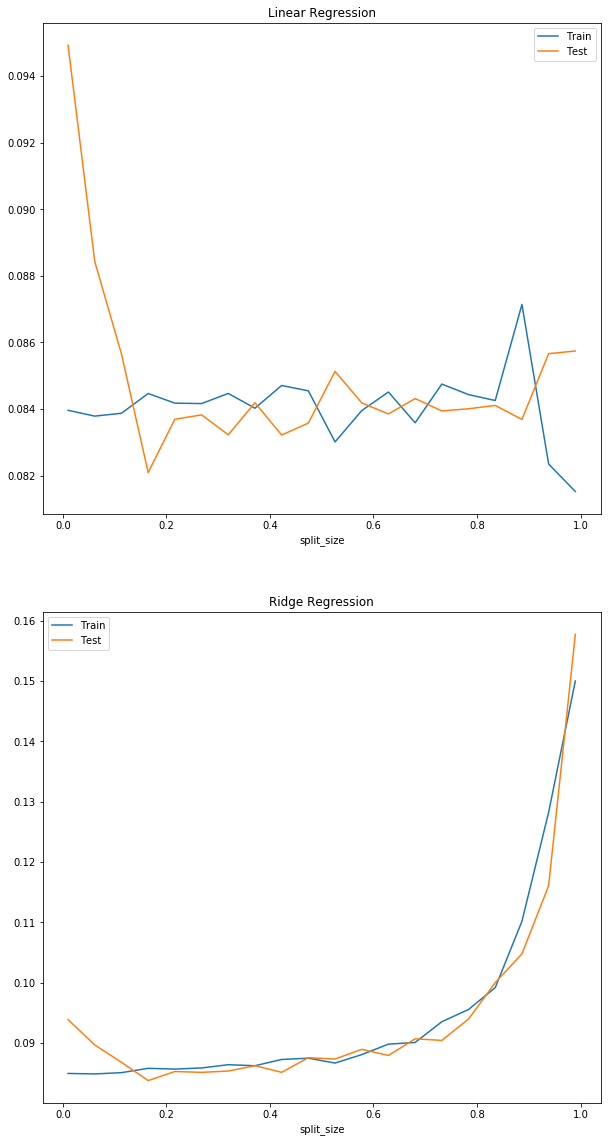

In [29]:
import sys
splits = np.linspace(.01, .99,20)
np.random.seed(1256)
errValuesRegression = []
errValuesRidge = []

min_err = (sys.float_info.max, 0.0) #min err, split

for split in splits:
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=split)
    
    lr = LinearRegression()
    lr.fit(xtrain,ytrain)

    train_err = mean_squared_error(ytrain, np.dot(xtrain, lr.coef_) + lr.intercept_)
    test_err =  mean_squared_error(ytest, np.dot(xtest,lr.coef_) + lr.intercept_)
    
    errValuesRegression.append((train_err, test_err))
    
    ridge = Ridge(alpha=100.0,fit_intercept=True)
    ridge.fit(xtrain, ytrain)

    train_err2 = mean_squared_error(ytrain, np.dot(xtrain, ridge.coef_) + ridge.intercept_)
    test_err2 =  mean_squared_error(ytest, np.dot(xtest,ridge.coef_) + ridge.intercept_)
    
    #track min error for ridge
    if test_err2 < min_err[0]:
        min_err = (test_err2, split)
    
    errValuesRidge.append((train_err2, test_err2))

fig = plt.figure(figsize=(10,8))


xerrTrain = [e[0] for e in errValuesRegression]
xerrTest = [e[1] for e in errValuesRegression]

ax = fig.add_subplot(2,1,1)
ax.set_xlabel('split_size')
ax.set_title('Linear Regression')
ax.plot(splits, xerrTrain,label='Train' )
ax.plot(splits, xerrTest,label='Test' )
ax.legend()

xerrTrain2 = [e[0] for e in errValuesRidge]
xerrTest2 = [e[1] for e in errValuesRidge]

ax = fig.add_subplot(2,1,2)
ax.plot(splits, xerrTrain2,label='Train' )
ax.plot(splits, xerrTest2,label='Test' )
ax.set_xlabel('split_size')
ax.set_title('Ridge Regression')
ax.legend()

fig.subplots_adjust(top=2.0)

print('min error {0}'.format(min_err[0]))
print('optimal split at {0}'.format(min_err[1]))


## 4. Chose an ideal split size based on the previous plot for Ridge.
## Vary the Ridge parameter `alpha` from 0 to any value you'd like above 1. Plot the Train and Test error. Describe what you see based on the `alpha` parameter's stiffness.

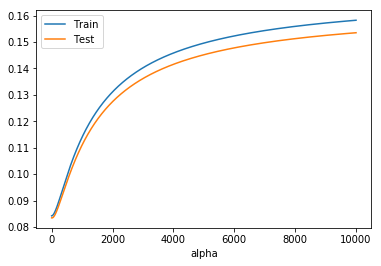

In [35]:
np.random.seed(1256)
alpha = np.linspace(0.0, 10000, 1000)
errValuesRidge = []

split = min_err[1]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=split)
    
for a in alpha:
    ridge = Ridge(alpha=a,fit_intercept=True)
    ridge.fit(xtrain, ytrain)

    train_err = mean_squared_error(ytrain, np.dot(xtrain, ridge.coef_) + ridge.intercept_)
    test_err =  mean_squared_error(ytest, np.dot(xtest,ridge.coef_) + ridge.intercept_)
    
    errValuesRidge.append([train_err, test_err])

xerrTrain = [e[0] for e in errValuesRidge]
xerrTest = [e[1] for e in errValuesRidge]

plt.plot(alpha, xerrTrain,label='Train' )
plt.plot(alpha, xerrTest,label='Test' )
plt.xlabel('alpha')
plt.legend()
plt.show()

## Bonus. Either: Generate data  with a polynomial shape or use real data that you find on your own. Choose whatever regression model and process you'd like (Ridge, polynomial, etc.) and plot the Train-Test errors vs. any parameter your Model depends on (e.g. `alpha`, `degree`, etc.)